# ***Dependências***



In [ ]:
import cv2
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import os
from google.colab import drive
from google.colab.patches import cv2_imshow
from keras.callbacks import TensorBoard
#from keras.preprocessing.image import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, MaxPooling2D, Flatten, Conv2D
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from IPython.display import Image

# ***Acessando Dataset FER-2013***


In [ ]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
caminho = "/content/gdrive/MyDrive/archive.zip"
obj_zipado = zipfile.ZipFile(file=caminho, mode="r")
obj_zipado.extractall("./")

Exception ignored in: <function ZipFile.__del__ at 0x7d3302a06160>
Traceback (most recent call last):
  File "/usr/lib/python3.11/zipfile.py", line 1895, in __del__
  File "/usr/lib/python3.11/zipfile.py", line 1917, in close
  File "/usr/lib/python3.11/zipfile.py", line 2017, in _fpclose
OSError: [Errno 107] Transport endpoint is not connected


# ***Testando e procurando alguma imagem no Dataset***

In [ ]:
# array_img = cv2.imread("/content/Training_10118481.jpg")
array_img = cv2.imread(r'/content/train/angry/Training_10118481.jpg')


In [ ]:
# checando tamanho da imagem e canais de cores
array_img.shape

(48, 48, 3)

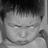

In [ ]:
# mostrando por OpenCV
cv2_imshow(array_img)

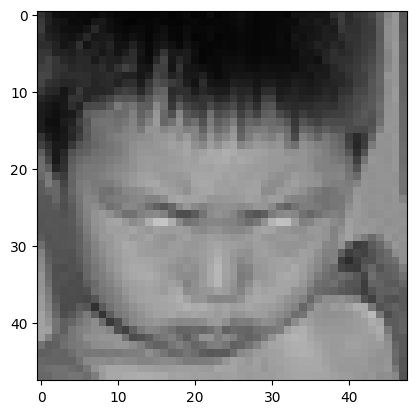

In [ ]:
# mostrando por MatPlotLib
plt.imshow(array_img)

# ***Revelando as imagens***

In [ ]:
os.listdir("/content/train")


['disgust', 'happy', 'sad', 'fear', 'neutral', 'angry', 'surprise']

In [ ]:
emotions = ['neutral', 'angry', 'happy', 'sad', 'disgust', 'fear', 'surprise']
emotion = 'happy'
caminho_emotions = "/content/train/"

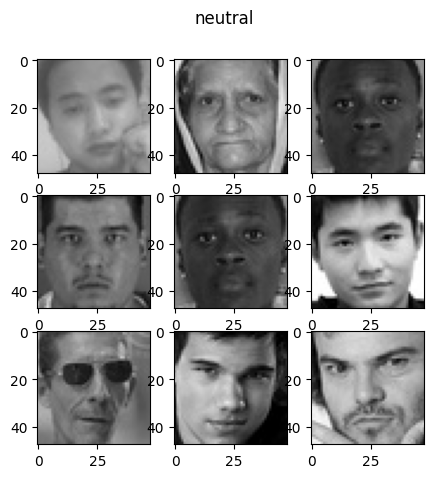

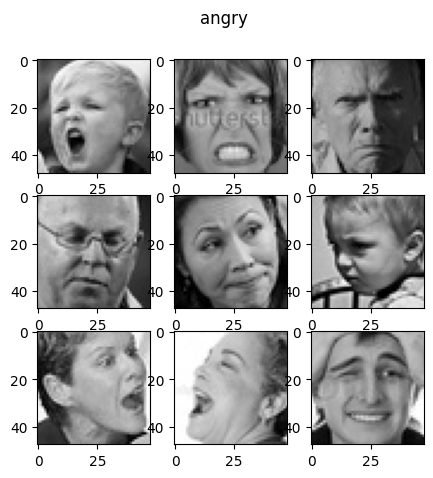

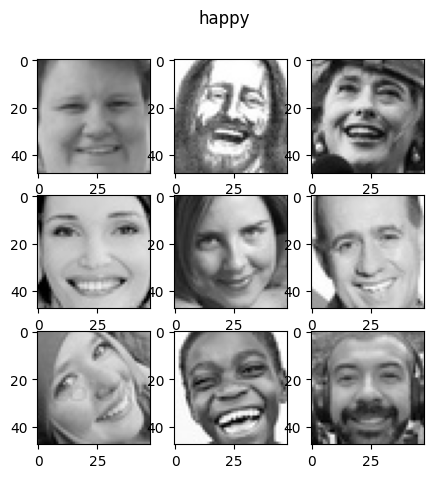

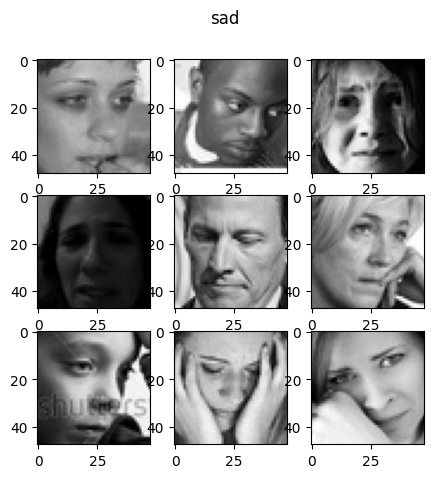

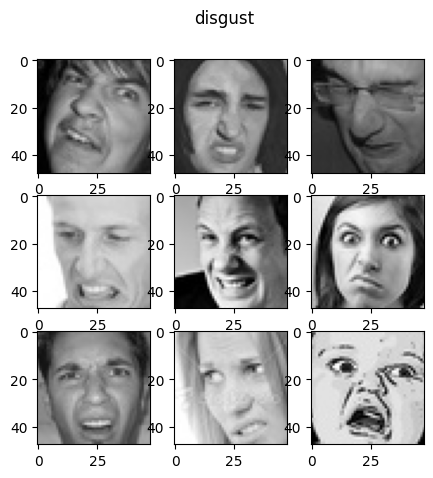

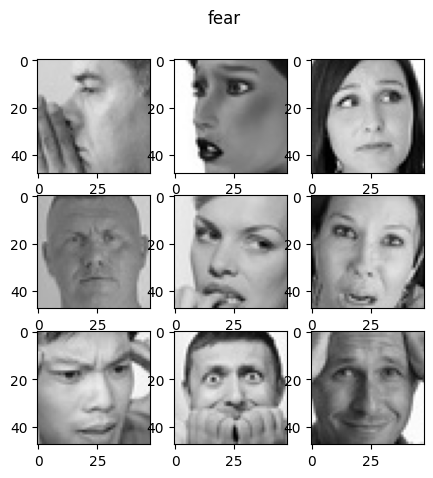

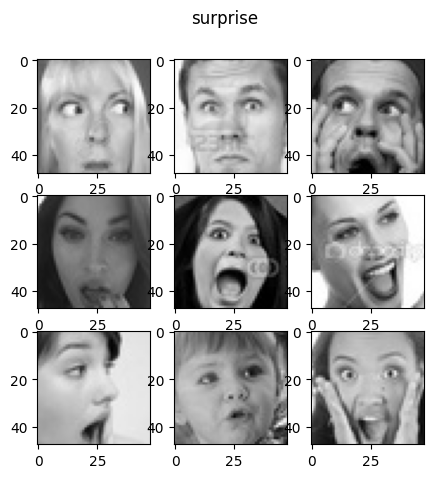

In [ ]:
for j in emotions:
  fig = plt.figure(figsize=(5,5))
  fig.suptitle(j)
  #print(j)
  for i in range(1, 10, 1):
    #print(i)
    plt.subplot(3, 3, i)
    nome = caminho_emotions+j+"/"+os.listdir(caminho_emotions+j)[i]
    #print(nome)
    img = load_img(nome)
    plt.imshow(img)
#plt.show()

# Créditos ao canal Tulsee Bisen, https://www.youtube.com/channel/UCBMwxwo2d1el1d1i-b9XyEA

# ***Testando modelo***

In [ ]:
# Criando Dados de Validação (test) e Treinamento (train) usando as pastas de dados

caminho_data = "/content/"
train_data = ImageDataGenerator()

test_data = ImageDataGenerator()

train_set = train_data.flow_from_directory(caminho_data+"train",
                                           target_size=(48,48),
                                           color_mode="rgb",
                                           batch_size=32,
                                           class_mode="categorical",
                                           shuffle=True)

test_set = test_data.flow_from_directory(caminho_data+"test",
                                           target_size=(48,48),
                                           color_mode="rgb",
                                           batch_size=32,
                                           class_mode="categorical",
                                           shuffle=True)



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
num_classes = len(emotions)

In [ ]:
base_model = VGG19( input_shape=(48,48,3), include_top= False)

for layer in base_model.layers:
  layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(units=7, activation='softmax')(x)

modelo = Model(base_model.input, x)

In [ ]:

#Criando o modelo/arquitetura de camadas

modelo = Sequential()

modelo.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(48,48,3)))
modelo.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Dropout(0.2))

modelo.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Conv2D(128, kernel_size=(3,3), activation="relu"))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Dropout(0.2))

modelo.add(Flatten())

modelo.add(Dense(1024, activation="relu"))
modelo.add(Dropout(0.5))
modelo.add(Dense(7, activation="softmax"))

# Créditos ao canal Data Magic, https://www.youtube.com/watch?v=UHdrxHPRBng
# Créditos ao canal Nicholas Renotte, https://www.youtube.com/watch?v=jztwpsIzEGc
# Créditos ao canal Tulsee Bisen, https://www.youtube.com/watch?v=-HP1bDP46mQ

In [ ]:
# Compilando o modelo de camadas

modelo.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
modelo.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 46, 46, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 44, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 20, 20, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 7)                   │           7,175 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,235,527 (8.53 MB)

 Trainable params: 2,235,527 (8.53 MB)

 Non-trainable params: 0 (0.00 B)

# ***Treinamento do modelo***

In [ ]:
dir_log = 'logs'
checkpoint_filepath = '/content/checkpoint.weights.h5'

callback_board = tf.keras.callbacks.TensorBoard(log_dir=dir_log)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
# treinamento sem aug
historico = modelo.fit(
    train_set,
    epochs=60,
    validation_data=test_set,
    callbacks=[callback_board, model_checkpoint_callback]
)

# treinamento com aug
# historico = modelo.fit(
#    train_set2,
#    epochs=50,
#    validation_data=test_set2
# )

# salvando modelo como json
modelo_json = modelo.to_json()
with open("modelo.json", "w") as json_file:
  json_file.write("modelo_json")

# salvando pesos da CNN
modelo.save_weights("modelo.weights.h5")

Epoch 1/60
898/898 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8520 - loss: 0.4214 - val_accuracy: 0.5851 - val_loss: 1.4073
Epoch 2/60
898/898 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8434 - loss: 0.4567 - val_accuracy: 0.5908 - val_loss: 1.4101
Epoch 3/60
898/898 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.8477 - loss: 0.4333 - val_accuracy: 0.5911 - val_loss: 1.4527
Epoch 4/60
898/898 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8523 - loss: 0.4235 - val_accuracy: 0.5931 - val_loss: 1.4127
Epoch 5/60
898/898 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.8541 - loss: 0.4224 - val_accuracy: 0.5878 - val_loss: 1.3644
Epoch 6/60
898/898 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8480 - loss: 0.4296 - val_accuracy: 0.5915 - val_loss: 1.4039
Epoch 7/60
898/898 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8401 - loss: 0.4614 - val_accuracy: 0.5879 - val_loss: 1.4218
Epoch 8/60
898/898 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8567 - loss: 0.4148 - 

In [ ]:
historico.history

{'accuracy': [0.8378208875656128,
  0.8384130597114563,
  0.8461806178092957,
  0.8402591347694397,
  0.8468772768974304,
  0.8466683030128479,
  0.8383781909942627,
  0.8485840559005737,
  0.8492110371589661,
  0.8585112690925598,
  0.8517189621925354,
  0.8462502956390381,
  0.8554808497428894,
  0.8616113662719727,
  0.8525897860527039,
  0.8609147071838379,
  0.8621686697006226,
  0.8597652316093445,
  0.8599393963813782,
  0.8632135987281799,
  0.8654777407646179,
  0.8675328493118286,
  0.8673586845397949,
  0.8642237782478333,
  0.8601832389831543,
  0.8708767294883728,
  0.8681946396827698,
  0.8684384822845459,
  0.8674631714820862,
  0.8666620254516602,
  0.8699014186859131,
  0.874603807926178,
  0.8726531863212585,
  0.8717126846313477,
  0.8720958828926086,
  0.8715037107467651,
  0.8724093437194824,
  0.8744992613792419,
  0.8741509914398193,
  0.8758577704429626,
  0.8754745721817017,
  0.8757184147834778,
  0.8723048567771912,
  0.8785049915313721,
  0.8829635381698608,

# ***Gráfico da CNN***

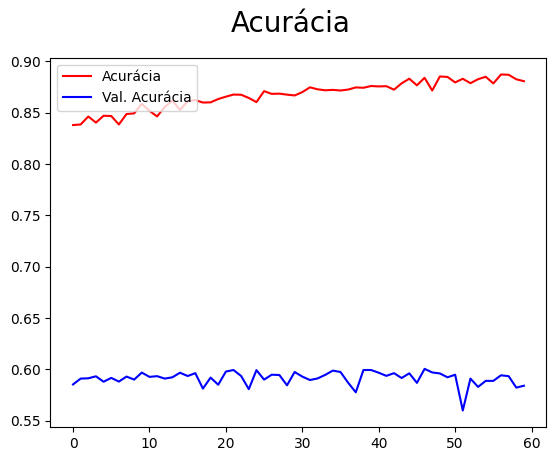

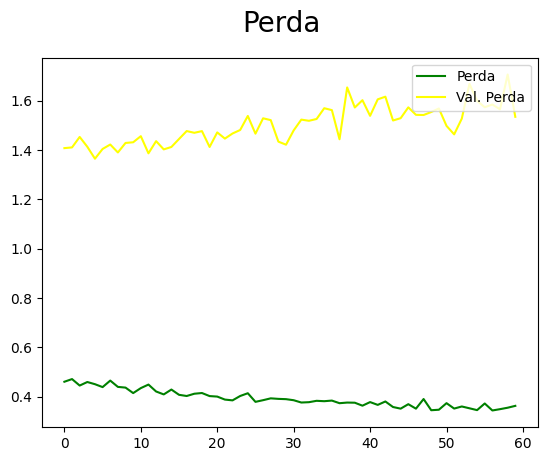

In [ ]:
grafico1 = plt.figure()

plt.plot(historico.history['accuracy'], color='red', label='Acurácia')
plt.plot(historico.history['val_accuracy'], color='blue', label='Val. Acurácia')
grafico1.suptitle('Acurácia', fontsize=20)
plt.legend(loc="upper left")
plt.show()

grafico2 = plt.figure()

plt.plot(historico.history['loss'], color='green', label='Perda')
plt.plot(historico.history['val_loss'], color='yellow', label='Val. Perda')
grafico2.suptitle("Perda", fontsize=20)
plt.legend(loc="upper right")
plt.show()

# ***Teste em imagem***

In [ ]:
caminho_testes = "/content/gdrive/MyDrive/Material (1).zip"
obj_zipado = zipfile.ZipFile(file=caminho_testes, mode="r")
obj_zipado.extractall("./")

In [ ]:
imagem = cv2.imread(r'/content/Material/testes/teste04.jpg')

In [ ]:
imagem.shape

(800, 800, 3)

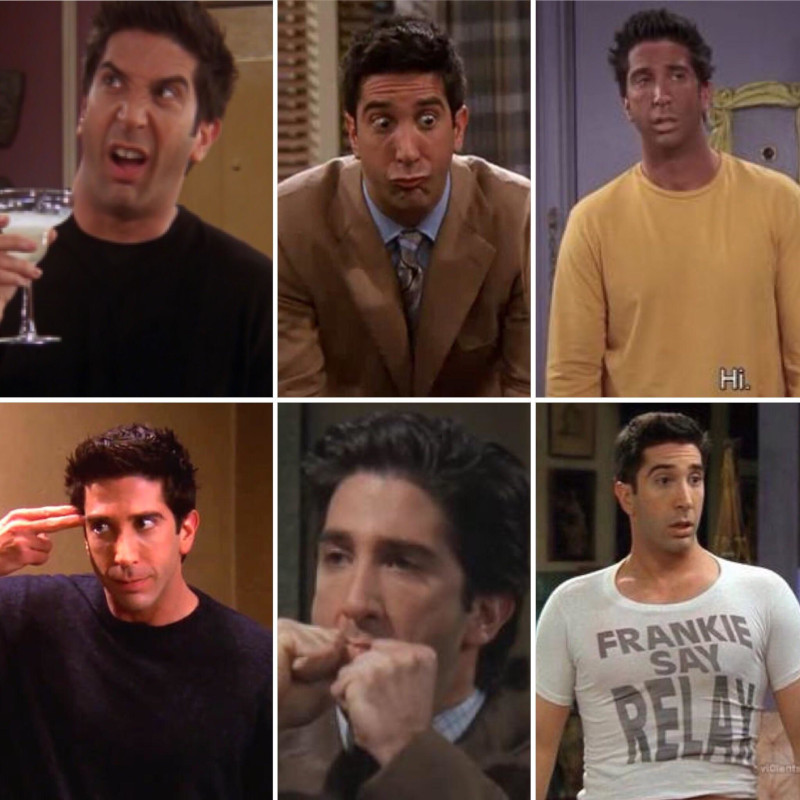

In [ ]:
# teste em RGB by opencv

cv2_imshow(imagem)

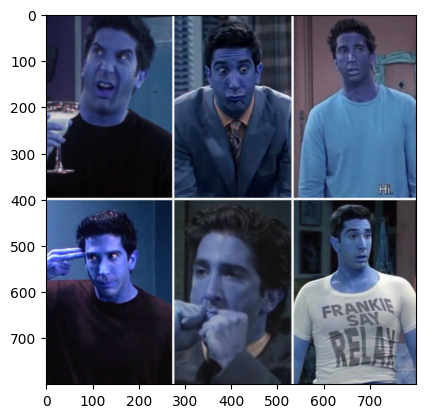

In [ ]:
# teste em BGR by matplotlib
plt.imshow(imagem)

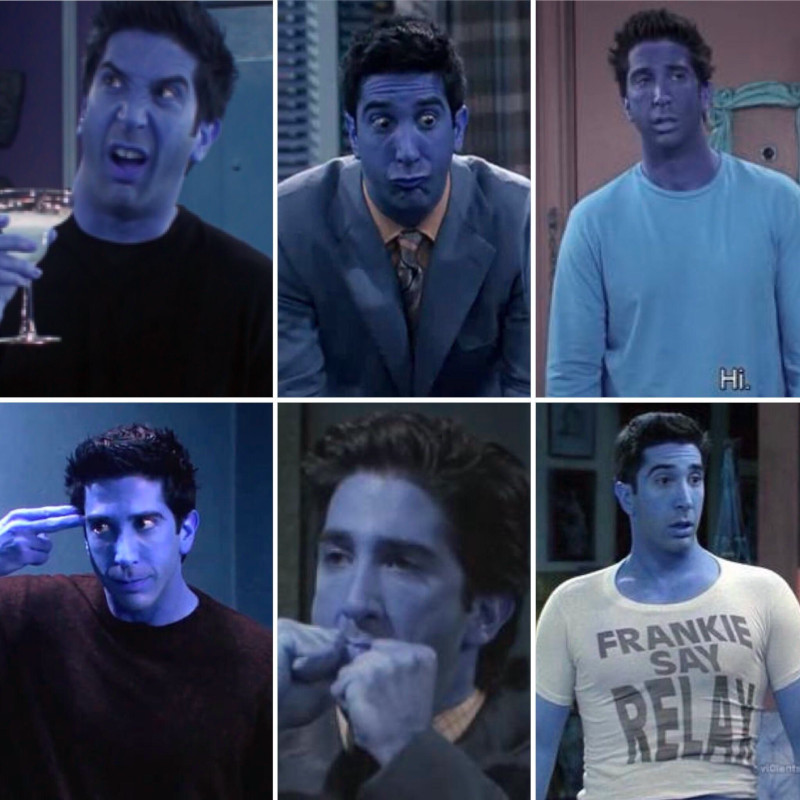

In [ ]:
original = imagem.copy()

imagem_grayscale = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
cv2_imshow(imagem_grayscale)

In [ ]:
caminho_cascade = "/content/gdrive/MyDrive/Material (1).zip"
obj_zipado = zipfile.ZipFile(file=caminho_cascade, mode="r")
obj_zipado.extractall("./")

In [ ]:
cascade_class = cv2.CascadeClassifier('/content/Material/haarcascade_frontalface_default.xml')
rostos = cascade_class.detectMultiScale(imagem_grayscale, 1.32, 5)

In [ ]:
rostos

array([[608,  35, 106, 106],
       [ 58,  25, 165, 165],
       [339,  64, 127, 127],
       [638, 445,  88,  88],
       [274, 481, 193, 193]], dtype=int32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


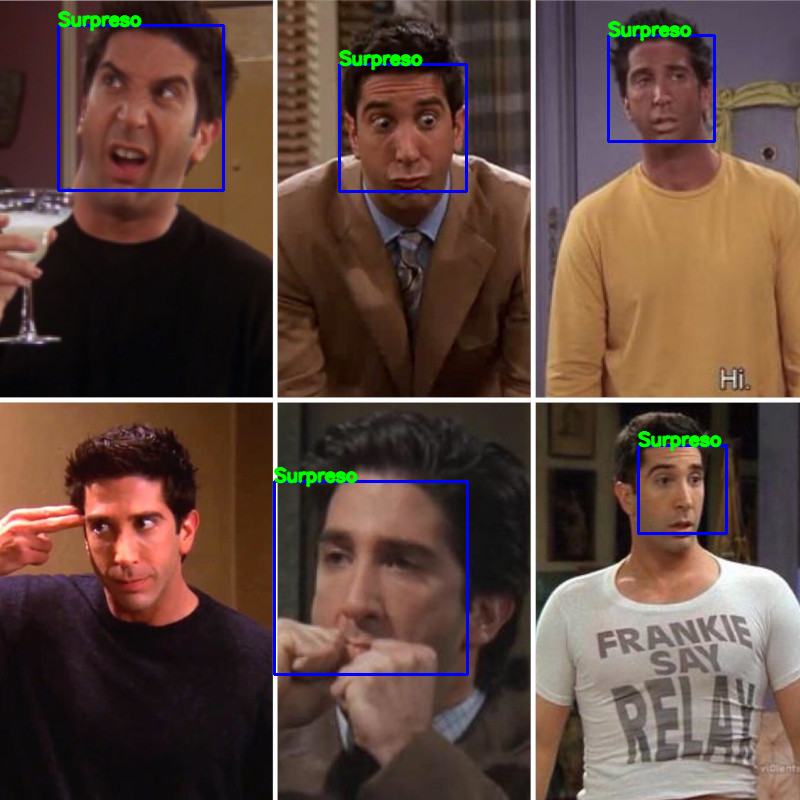

In [ ]:
emocoes = ['Raiva', 'Nojo', 'Medo', 'Feliz', 'Triste', 'Surpreso', 'Neutro']

for(x, y, w, h) in rostos:
  cv2.rectangle(original, (x, y), (x + w, y + h), (255, 0, 0), thickness=2)
  roi = imagem_grayscale[y:y + h, x:x + w]
  roi = cv2.resize(roi, (48,48))
  img_pixels = tf.keras.preprocessing.image.img_to_array(roi)
  img_pixels = np.expand_dims(img_pixels, axis=0)
  img_pixels /= 255

  predict = modelo.predict(img_pixels)

  index_max = np.argmax(predict[0])

  emocoes_predict = emocoes[index_max]

  cv2.putText(original, emocoes_predict, (int(x), int(y)),
              cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2, cv2.LINE_AA)

  #print(np.argmax(predicao))

resize_img = cv2.resize(original, (1000, 700))
cv2_imshow(original)
#predicao
#np.argmax(predicao)

# ***Teste em câmera/webcam***

In [ ]:
# Créditos ao canal The AI Guy, https://www.youtube.com/watch?v=YjWh7QvVH60

def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

In [ ]:
# Snippet de código "Camera Capture" oferecido pela Google através do Google Colab

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))

  f = js_to_image(data)
  ori = f.copy()

  bgr = cv2.cvtColor(ori, cv2.COLOR_RGB2BGR)
  print(bgr.shape)

  rosto = cascade_class.detectMultiScale(bgr, 1.32, 5)

  for(x,y,w,h) in rosto:
    cv2.rectangle(ori, (x,y), (x+w, y+h), (255,0,0), 2)
    roi_img = bgr[y:y + h, x:x + w]
    roi_img = cv2.resize(roi_img, (48,48))
    img_pix = tf.keras.preprocessing.image.img_to_array(roi_img)
    img_pix = np.expand_dims(img_pix, axis=0)
    img_pix /= 255

    predicts = modelo.predict(img_pix)

    index_maximo = np.argmax(predicts[0])

    emocoes_predicts = emocoes[index_maximo]

    cv2.putText(ori, emocoes_predicts, (int(x), int(y)),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2, cv2.LINE_AA)

  resized_img = cv2.resize(ori, (1000, 700))
  cv2.imwrite(filename, resized_img)

  return filename

<IPython.core.display.Javascript object>

(480, 640, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Saved to photo.jpg


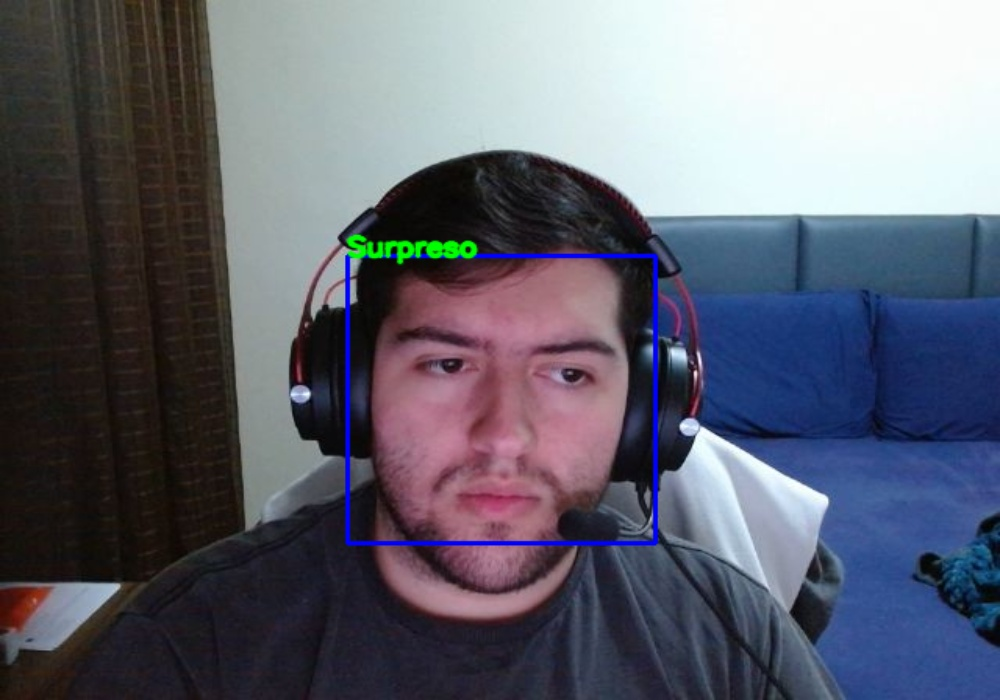

In [ ]:
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))